# Task 1 for Winstars AI DS internship test
#### Author: `Dmytro Avdieienko`

Import required libraries


In [1]:
# Import required libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from abc import ABC, abstractmethod
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

## Abstract class

Defining abstract class and interface for MNIST Classifiers

In [2]:
# Abstract class for interface definition
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, x_train, y_train):
        pass

    @abstractmethod
    def predict(self, x_test):
        pass

## Random Forest Classifier

In [3]:
class RFClassifier(MnistClassifierInterface):
    def __init__(self, n_estimators=100, random_state=None):
        """
        Initialize Random Forest classifier

        Parameters:
        n_estimators (int): Number of trees in the forest
        random_state (int): Random state for reproducibility
        """
        self.model = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state,
            n_jobs=-1  # For parallel computation
        )
        self.scaler = StandardScaler()

    def train(self, x_train, y_train):
        # Reshaping into flat vector
        x_train_flat = x_train.reshape(x_train.shape[0], -1)
        self.model.fit(x_train_flat, y_train)

    def predict(self, x_test):
        x_test_flat = x_test.reshape(x_test.shape[0], -1)
        return self.model.predict(x_test_flat)

### Load and prepare data

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# See shapes
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


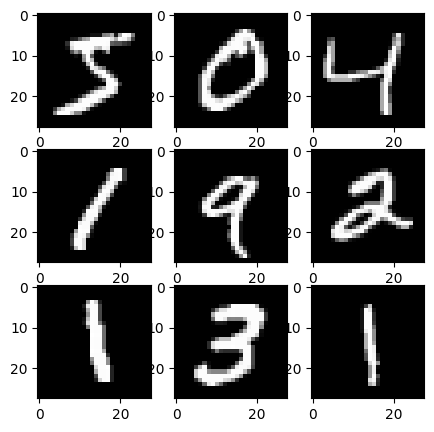

In [5]:
# See pictures from dataset
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# Normalize pixel values
if x_train.max() > 1.0:  # check if already normalized
    x_train = x_train / 255.0
    x_test = x_test / 255.0

### Train and predict

In [7]:
# Initialize and train RF classifier
rf_clf = RFClassifier()
rf_clf.train(x_train, y_train)

In [8]:
# Make predictions
y_predicted = rf_clf.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9706


## Feed-Forward Neural Network Classifier

In [4]:
class NNClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        self.history = None

    def train(self, x_train, y_train):
        self.model.fit(x_train, y_train, epochs=10)

    def predict(self, x_test):
        return self.model.predict(x_test).argmax(axis=1)

    def train_with_validation(self, x_train, y_train, x_val, y_val):
        # extended version with history for tracking overfitting
        history = self.model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=50,
            verbose=1
        )
        self.history = history.history

    def plot_learning_curves(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history['accuracy'], label='Training accuracy')
        plt.plot(self.history['val_accuracy'], label='Validation accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Learning Curves for Neural Network')
        plt.legend()
        plt.grid(True)
        plt.show()

### Load and prepare data

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# See shapes
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


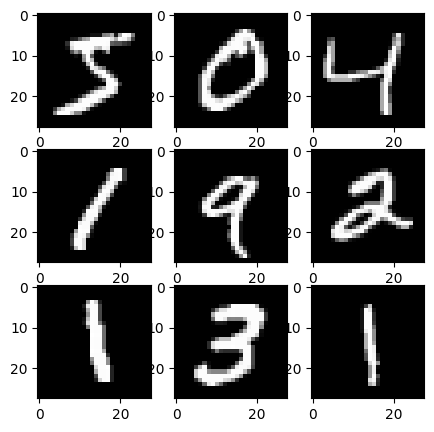

In [11]:
# See pictures from dataset
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
# Normalize pixel values
if x_train.max() > 1.0:  # check if already normalized
    x_train = x_train / 255.0
    x_test = x_test / 255.0

### Train and predict

In [13]:
# Initialize and train NN classifier
nn_clf = NNClassifier()
nn_clf.train(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3689 - accuracy: 0.8880
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1909 - accuracy: 0.9424
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1502 - accuracy: 0.9553
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1321 - accuracy: 0.9601
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1211 - accuracy: 0.9623
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1104 - accuracy: 0.9660
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1046 - accuracy: 0.9668
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1013 - accuracy: 0.9685
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0953 - accuracy: 0.9699
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

In [14]:
# Make predictions
y_predicted = nn_clf.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 4ms/step
Test accuracy: 0.9730


### Visualisation of learning curves

In [15]:
# Initialize and train NN classifier
nn_clf_2 = NNClassifier()
nn_clf_2.train_with_validation(x_train, y_train, x_test, y_test)

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3655 - accuracy: 0.8889 - val_loss: 0.1608 - val_accuracy: 0.9514
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1923 - accuracy: 0.9425 - val_loss: 0.1138 - val_accuracy: 0.9653
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1539 - accuracy: 0.9531 - val_loss: 0.1050 - val_accuracy: 0.9676
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1337 - accuracy: 0.9582 - val_loss: 0.0964 - val_accuracy: 0.9697
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1209 - accuracy: 0.9629 - val_loss: 0.0952 - val_accuracy: 0.9707
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1093 - accuracy: 0.9668 - val_loss: 0.0899 - val_accuracy: 0.9736
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1028 - accuracy: 0.9679 - val_loss: 0.0858 - val_acc

In [16]:
# Make predictions
y_predicted = nn_clf_2.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step
Test accuracy: 0.9779


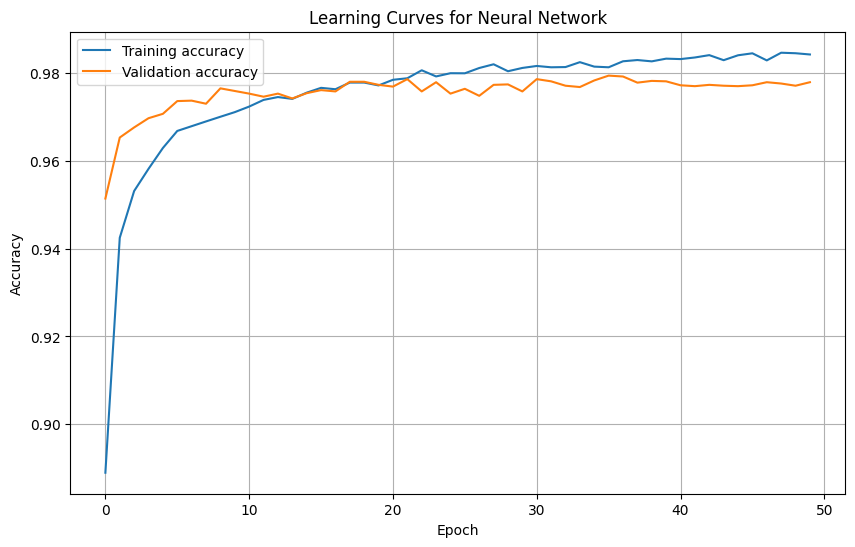

In [17]:
nn_clf_2.plot_learning_curves()

## Convolutional Neural Network Classifier

In [5]:
class CNNClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
        self.history = None

    def train(self, x_train, y_train):
        x_train = x_train.reshape(-1, 28, 28, 1)
        self.model.fit(x_train, y_train, epochs=10)

    def predict(self, x_test):
        x_test = x_test.reshape(-1, 28, 28, 1)
        return self.model.predict(x_test).argmax(axis=1)

    def train_with_validation(self, x_train, y_train, x_val, y_val):
        # Reshape input data
        x_train = x_train.reshape(-1, 28, 28, 1)
        x_val = x_val.reshape(-1, 28, 28, 1)

        # Train with validation
        history = self.model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=20,
            verbose=1
        )
        self.history = history.history

    def plot_learning_curves(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history['accuracy'], label='Training accuracy')
        plt.plot(self.history['val_accuracy'], label='Validation accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Learning Curves for Convolutional Neural Network')
        plt.legend()
        plt.grid(True)
        plt.show()

### Load and prepare data

In [19]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# See shapes
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


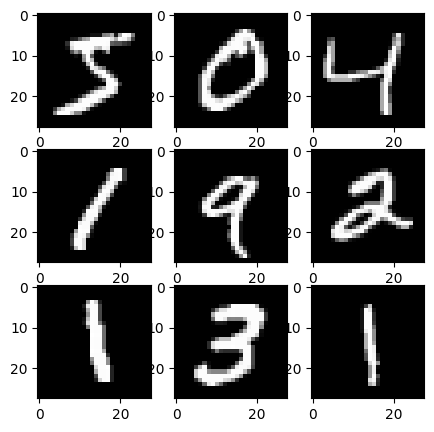

In [20]:
# See pictures from dataset
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
# Normalize pixel values
if x_train.max() > 1.0:  # check if already normalized
    x_train = x_train / 255.0
    x_test = x_test / 255.0

### Train and predict

In [22]:
# Initialize and train NN classifier
cnn_clf = CNNClassifier()
cnn_clf.model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [23]:
# Train the model
cnn_clf.train(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1490 - accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0521 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0146 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/st

In [24]:
# Make predictions
y_predicted = cnn_clf.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step
Test accuracy: 0.9910


### Visualisation of learning curves

In [25]:
# Initialize and train CNN classifier
cnn_clf_2 = CNNClassifier()
cnn_clf_2.train_with_validation(x_train, y_train, x_test, y_test)

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1532 - accuracy: 0.9531 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0360 - val_accuracy: 0.9884
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0298 - val_accuracy: 0.9916
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0270 - val_ac

In [26]:
# Make predictions
y_predicted = cnn_clf_2.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_predicted == y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9924


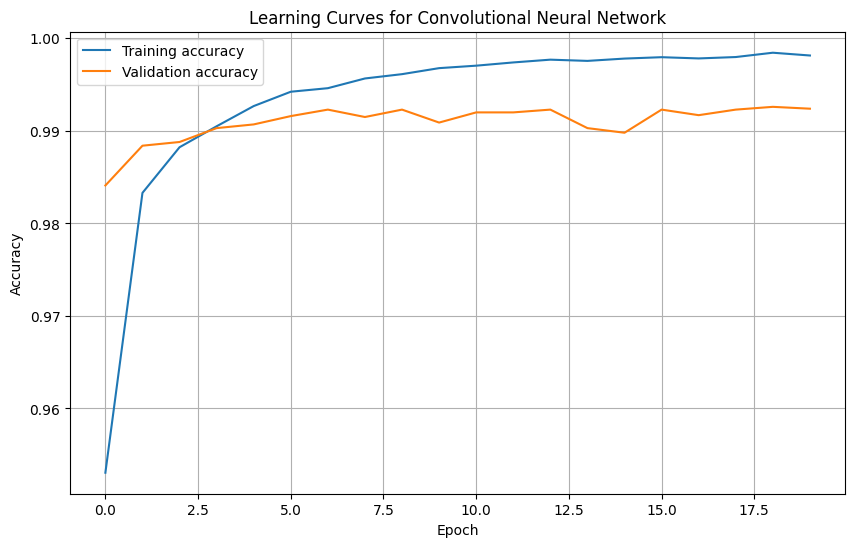

In [27]:
cnn_clf_2.plot_learning_curves()

## MnistClassifier

In [6]:
class MnistClassifier:
    def __init__(self, algorithm: str = 'cnn'):
        """
        Initialize MNIST classifier with specified algorithm

        Args:
            algorithm: One of ['cnn', 'rf', 'nn']
        """
        self.algorithm = algorithm.lower()
        self.models = {
            'cnn': CNNClassifier,
            'rf': RFClassifier,
            'nn': NNClassifier
        }

        if self.algorithm not in self.models:
            raise ValueError(f"Algorithm must be one of {list(self.models.keys())}")

        self.model = self.models[self.algorithm]()

    def train(self, x_train: np.ndarray, y_train: np.ndarray):
        self.model.train(x_train, y_train)

    def predict(self, x_test: np.ndarray):
        return self.model.predict(x_test)

### Load and prepare data

In [7]:
# Load MNIST dataset
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# See shapes
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


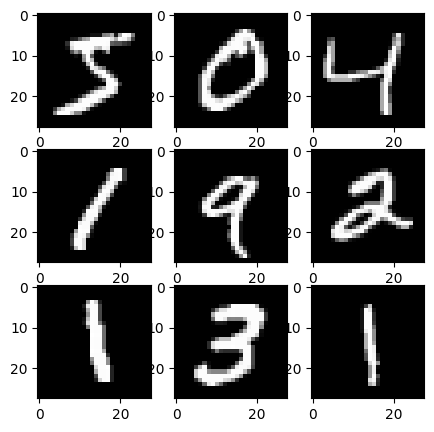

In [8]:
# See pictures from dataset
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(training_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
# Normalize pixel values
if training_images.max() > 1.0:  # check if already normalized
    training_images = training_images / 255.0
    test_images = test_images / 255.0

### Testing the Implementation

In [10]:
for algorithm in ['rf', 'nn', 'cnn']:
    print(f"\nTesting {algorithm.upper()} classifier:")
    classifier = MnistClassifier(algorithm=algorithm)
    classifier.train(training_images, training_labels)
    predictions = classifier.predict(test_images)
    accuracy = np.mean(predictions == test_labels)
    print(f"Test accuracy: {accuracy:.4f}")
    print('')


Testing RF classifier:
Test accuracy: 0.9697


Testing NN classifier:
Epoch 1/10
1875/1875 [==============================] - 2s 779us/step - loss: 0.3546 - accuracy: 0.8911
Epoch 2/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.1838 - accuracy: 0.9434
Epoch 3/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.1480 - accuracy: 0.9547
Epoch 4/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.1317 - accuracy: 0.9598
Epoch 5/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.1210 - accuracy: 0.9621
Epoch 6/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.1118 - accuracy: 0.9649
Epoch 7/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.1050 - accuracy: 0.9682
Epoch 8/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0992 - accuracy: 0.9685
Epoch 9/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.0945 - accuracy: 